In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm 
from sklearn import metrics

In [3]:
data = pd.read_csv('cancer.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.shape

(569, 33)

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.drop(['Unnamed: 32', 'id'],axis = 1,inplace = True)

In [8]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


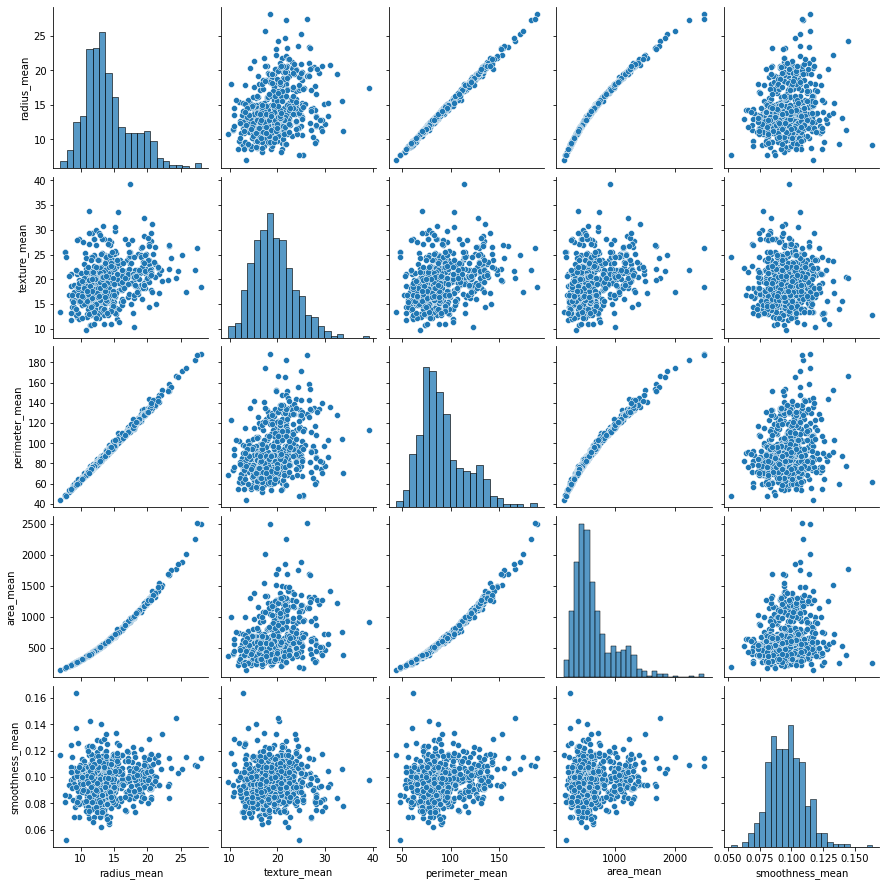

In [9]:
sns.pairplot(data, vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

In [10]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
data["diagnosis"]= data["diagnosis"].map({'M':1,'B': 0})

In [12]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

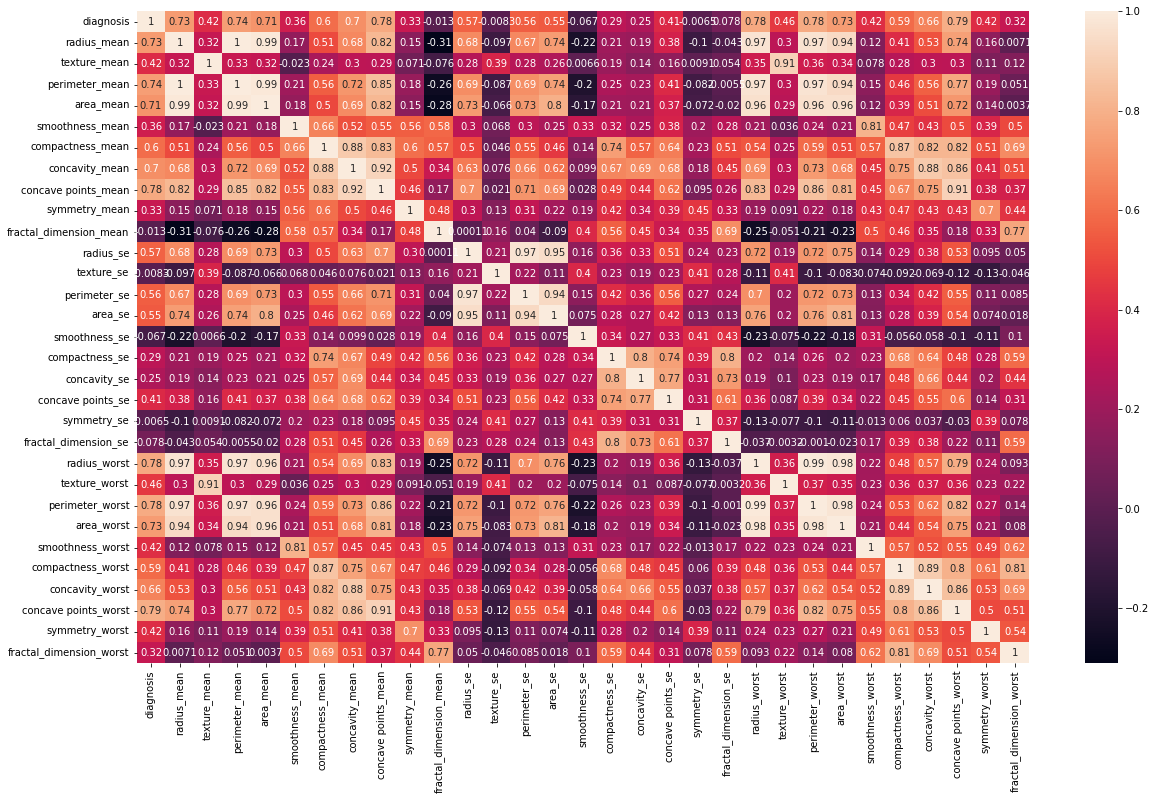

In [14]:
plt.figure(figsize=(20,12)) 
sns.heatmap(data.corr(), annot=True) 

In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

diagnosis                   0
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

In [16]:
data = data.drop_duplicates()

In [21]:
x = data.drop(['diagnosis'], axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
y = data['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=1)

In [24]:
print("x_train-shape : ", x_train.shape)
print("y_train-shape : ", y_train.shape)
print("x_test-shape : ", x_test.shape)
print("y_test-shape : ", y_test.shape)

x_train-shape :  (426, 30)
y_train-shape :  (426,)
x_test-shape :  (143, 30)
y_test-shape :  (143,)


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
sc_fit = sc.fit(x_train)
x_train_sc = sc_fit.transform(x_train)
x_test_sc = sc_fit.transform(x_test)

In [27]:
x_train_sc_df = pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc_df = pd.DataFrame(x_test_sc, columns=x_test.columns)

In [37]:
from sklearn.model_selection import GridSearchCV

params = {"kernel":['linear', 'poly', 'rbf'],
       "degree":[1,2,3,4],
       "gamma":[0.1, 1,.001],
       "C":[0.001, 0.01, 0.1, 1, 10, 100]}

sv = svm.SVC()
svm = GridSearchCV(sv, params, cv=10, n_jobs=-1, verbose=True)
svm.fit(x_train_sc_df, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4], 'gamma': [0.1, 1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=True)

In [38]:
svm.best_params_

{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [41]:
import time
st = time.time()
sv1 = svm.SVC(kernel="rbf", degree=1,gamma=0.1, C=1, probability=True)
sv1.fit(x_train_sc_df, y_train)

print("Train score :", sv1.score(x_train_sc_df, y_train))
print("Test score :", sv1.score(x_test_sc_df, y_test))

Train score : 0.9906103286384976
Test score : 0.951048951048951


In [42]:
pred_train = sv1.predict(x_train_sc_df)
pred_test = sv1.predict(x_test_sc_df)

In [44]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       269
           1       0.99      0.98      0.99       157

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



In [45]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        88
           1       0.94      0.93      0.94        55

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



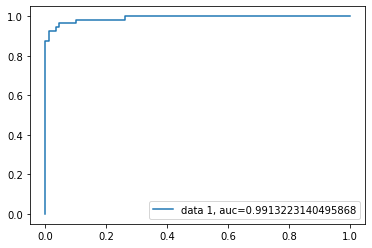

In [46]:
y_pred_prob = sv1.predict_proba(x_test_sc_df)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [47]:
model_report = pd.DataFrame()

tmp = pd.Series({'Model': " Support Vector Machine ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test),
                 'Precision Score': metrics.precision_score(y_test, pred_test),
                 'Recall Score': metrics.recall_score(y_test, pred_test),
                 'F1 Score' : metrics.f1_score(y_test, pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test)})

model_svm_report = model_report.append(tmp, ignore_index = True)
model_svm_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Support Vector Machine,0.946591,0.944444,0.927273,0.93578,0.951049


**Bagging classifier**

In [49]:
from sklearn.ensemble import BaggingClassifier
param_dist1 = {'n_estimators':[150,200,250,300],
              'bootstrap': [True, False],
              'max_features': [1,2,3,5,10],
              'max_samples' : [15,20,25,30]}

fit_bagging = BaggingClassifier(random_state = 1)

cv_bagging = GridSearchCV(fit_bagging, cv = 5, param_grid= param_dist1, n_jobs = -1, verbose = 1)

cv_bagging.fit(x_train_sc_df, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 5, 10],
                         'max_samples': [15, 20, 25, 30],
                         'n_estimators': [150, 200, 250, 300]},
             verbose=1)

In [50]:

cv_bagging.best_params_

{'bootstrap': True, 'max_features': 5, 'max_samples': 25, 'n_estimators': 200}

In [51]:
bagging = BaggingClassifier(n_estimators=200,max_samples=25, max_features=5, bootstrap=True, random_state=1)
bagging.fit(x_train_sc_df, y_train)

print('Train_accuracy', bagging.score(x_train_sc_df, y_train))
print('Test_accuracy', bagging.score(x_test_sc_df, y_test))

Train_accuracy 0.9624413145539906
Test_accuracy 0.9370629370629371


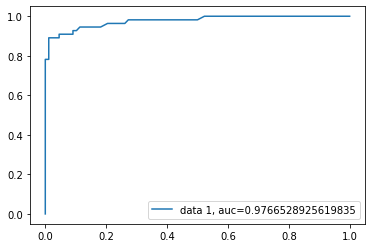

In [52]:
y_pred_prob = bagging.predict_proba(x_test_sc_df)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [53]:
test_pred_bag = bagging.predict(x_test_sc_df)

tmp2 = pd.Series({'Model': "Bagging Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_bag),
                 'Precision Score': metrics.precision_score(y_test, test_pred_bag),
                 'Recall Score': metrics.recall_score(y_test, test_pred_bag),
                 'F1 Score' : metrics.f1_score(y_test, test_pred_bag),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_bag)})

model_bag_report = model_report.append(tmp2, ignore_index = True)
model_bag_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Bagging Classifier,0.928409,0.942308,0.890909,0.915888,0.937063


**AdaBoost Classifier**

In [55]:
from sklearn.ensemble import AdaBoostClassifier
param_dist2 = {'n_estimators':[50,100,150,200],
               'learning_rate':[0.5,0.7,1,1.5,2]}

fit_adaboost = AdaBoostClassifier(random_state = 1)
cv_adaboost = GridSearchCV(fit_adaboost, cv = 5, param_grid= param_dist2, n_jobs = -1, verbose = 1)
cv_adaboost.fit(x_train_sc_df, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.7, 1, 1.5, 2],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [57]:
cv_adaboost.best_params_

{'learning_rate': 1.5, 'n_estimators': 150}

In [58]:
ABC = AdaBoostClassifier(n_estimators=150,learning_rate=1.5,random_state=1)
ABC.fit(x_train_sc_df, y_train)

print('Train_accuracy', ABC.score(x_train_sc_df, y_train))
print('Test_accuracy', ABC.score(x_test_sc_df, y_test))

Train_accuracy 1.0
Test_accuracy 0.965034965034965


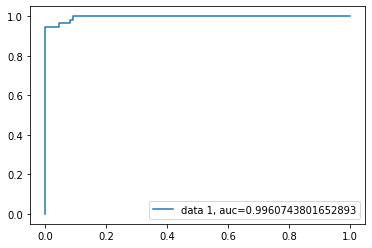

In [59]:
y_pred_prob = ABC.predict_proba(x_test_sc_df)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [61]:
test_pred_ABC = ABC.predict(x_test_sc_df)

tmp3 = pd.Series({'Model': " AdaBoost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_ABC),
                 'Precision Score': metrics.precision_score(y_test, test_pred_ABC),
                 'Recall Score': metrics.recall_score(y_test, test_pred_ABC),
                 'F1 Score' : metrics.f1_score(y_test, test_pred_ABC),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_ABC)})

model_ABC_report = model_report.append(tmp3, ignore_index = True)
model_ABC_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,AdaBoost Classifier,0.961364,0.962963,0.945455,0.954128,0.965035


**Model Comparision**

In [63]:
columns = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','F1 Score', 'Accuracy Score']
model = pd.DataFrame(columns = columns)
model = model.append([model_svm_report,model_bag_report,model_ABC_report], ignore_index = True)
model

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Support Vector Machine,0.946591,0.944444,0.927273,0.935780,0.951049
1,Bagging Classifier,0.928409,0.942308,0.890909,0.915888,0.937063
2,AdaBoost Classifier,0.961364,0.962963,0.945455,0.954128,0.965035
